In [4]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import scipy as sp
import sympy as sym

f(t)= 
1.27323954473516⋅cos(1.0471975511966⋅t) + 1.55926873300775e-16⋅cos(2.094395102
3932⋅t) - 0.424413181578388⋅cos(3.14159265358979⋅t) + 0.254647908947032⋅cos(5.
23598775598299⋅t) + 1.55926873300775e-16⋅cos(6.28318530717959⋅t) - 0.181891363
533595⋅cos(7.33038285837618⋅t) + 0.141471060526129⋅cos(9.42477796076938⋅t) + 1
.55926873300775e-16⋅cos(10.471975511966⋅t) - 0.115749049521379⋅cos(11.51917306
31626⋅t) + 0.0979415034411665⋅cos(13.6135681655558⋅t) + 1.55926873300775e-16⋅c
os(14.6607657167524⋅t) - 0.0848826363156777⋅cos(15.707963267949⋅t) + 0.0748964
438079508⋅cos(17.8023583703422⋅t) + 1.55926873300775e-16⋅cos(18.8495559215388⋅
t) - 0.0670126076176403⋅cos(19.8967534727354⋅t)


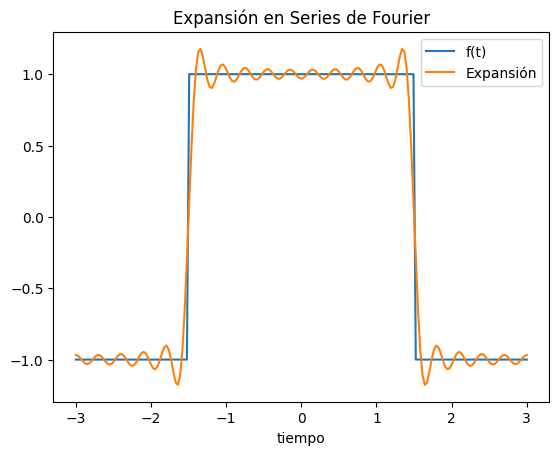

In [5]:
n = sym.Symbol('n')
t = sym.Symbol('t')

Tmin = -3 #Límite inferior de la función a trozos
Tmax = 3 #Límite superior de la función a trozos

T=Tmax-Tmin #Definimos el periodo de la función
w = 2*np.pi/T # Calcula la velocidad angular

# Se definen las funciones para los tres trozos
f1=-1
f2=1
f3=-1

# se define en ft la función a trozos
ft = sym.Piecewise((f1, ((t >= -T/2) & (t < -T/4))), (f2, ((t >= -T/4) & (t < T/4))),(f3, ((t >= T/4) & (t <= T/2))))
ft

# Se calculan los coeficientes a0, an y bn de la ecuación
# Se renombra la función f_integral como la función a integrar

f_integral = ft
a0 = (2/T)*sym.integrate(f_integral,(t,Tmin,Tmax))

f_integral = ft*sym.cos(n*w*t)
an = (2/T)*sym.integrate(f_integral,(t,Tmin,Tmax))
an = sym.simplify(an)

f_integral = ft*sym.sin(n*w*t)
bn = (2/T)*sym.integrate(f_integral,(t,Tmin,Tmax))

# Definimos el número de armónicos de la serie de Furier para la expansión
serie = 0
Armonicos = 20

for i in range(1,Armonicos+1):
    
    # Evaluamos los coeficientes para cada armónico
    an_c = an.subs(n,i)
    bn_c = bn.subs(n,i)
         
    serie= serie + an_c*sym.cos(i*w*t) # Términos coseno de la serie
    serie = serie + bn_c*sym.sin(i*w*t) # Términos seno de la serie

serie = a0/2+serie  # Expansión final de la serie de Fourier

print('f(t)= ')
sym.pprint(serie)

# Convertimos la expresión Sympy a una función evaluable
fserie = sym.lambdify(t,serie)
f = sym.lambdify(t,ft)

# Creamos un vector de tiempo para la gráfica
v_tiempo = np.linspace(Tmin,Tmax,200)

# Evaluamos las funciones
fserieG = fserie(v_tiempo)
fG = f(v_tiempo)
 
plt.plot(v_tiempo,fG,label = 'f(t)')
plt.plot(v_tiempo,fserieG,label = 'Expansión')

plt.xlabel('tiempo')
plt.legend()
plt.title('Expansión en Series de Fourier')
plt.show()

